In [1]:
pip install pandas scipy plotly mat4py

In [37]:
import pandas as pd
import plotly.graph_objects as go

In [26]:
file_path = '/content/drive/MyDrive/archive (1)/cleaned_dataset/metadata.csv'
df = pd.read_csv(file_path)

In [27]:
#Clean the 'start_time' column (assuming it's in list format)
def convert_start_time(time_list):
    try:
        time_list = eval(time_list)  # Convert string representation of list to actual list
        return pd.to_datetime(f"{time_list[0]}-{time_list[1]}-{time_list[2]} {time_list[3]}:{time_list[4]}:{time_list[5]}")
    except:
        return pd.NaT
df['start_time'] = df['start_time'].apply(convert_start_time)

In [28]:
# Convert 'Re', 'Rct', 'Capacity' to numeric, forcing errors to NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [29]:
# Handle missing values by directly assigning the filled values
df['Re'] = df['Re'].fillna(df['Re'].median())
df['Rct'] = df['Rct'].fillna(df['Rct'].median())
df['Capacity'] = df['Capacity'].fillna(df['Capacity'].mean())

In [30]:
# Replace all columns except the relevant ones with 1
for column in df.columns:
    if column not in ['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct']:
        df[column] = 1

In [31]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [32]:
# Save the cleaned dataset back to Google Drive
cleaned_file_path = '/content/drive/MyDrive/archive (1)/cleaned_dataset/cleaned_metadata.csv'
df.to_csv(cleaned_file_path, index=False)

In [33]:
# Show the cleaned dataset (optional)
print(df.head())

        type start_time  ambient_temperature battery_id  test_id  uid  \
0  discharge        NaT                    4      B0047        0    1   
1  impedance        NaT                   24      B0047        1    2   
2     charge        NaT                    4      B0047        2    3   
3  impedance        NaT                   24      B0047        3    4   
4  discharge        NaT                    4      B0047        4    5   

    filename  Capacity        Re       Rct  
0  00001.csv  1.674305  0.072553  0.101419  
1  00002.csv  1.326543  0.056058  0.200970  
2  00003.csv  1.326543  0.072553  0.101419  
3  00004.csv  1.326543  0.053192  0.164734  
4  00005.csv  1.524366  0.072553  0.101419  


#**plot for Re**

In [38]:
fig_re = go.Figure()

fig_re.add_trace(go.Scatter(
    x=df['test_id'],
    y=df['Re'],
    mode='lines+markers',
    name='Re (Electrolyte Resistance)',
    line=dict(color='blue')
))

fig_re.update_layout(
    title='Re (Electrolyte Resistance) vs Test Cycles',
    xaxis_title='Test Cycles',
    yaxis_title='Re (Ohms)',
    template='plotly_dark'
)

fig_re.show()

#**plot for Rct**

In [39]:
fig_rct = go.Figure()

fig_rct.add_trace(go.Scatter(
    x=df['test_id'],
    y=df['Rct'],
    mode='lines+markers',
    name='Rct (Charge Transfer Resistance)',
    line=dict(color='green')
))

fig_rct.update_layout(
    title='Rct (Charge Transfer Resistance) vs Test Cycles',
    xaxis_title='Test Cycles',
    yaxis_title='Rct (Ohms)',
    template='plotly_dark'
)

fig_rct.show()

#**plot for Battery Impedance**

In [40]:
fig_impedance = go.Figure()

fig_impedance.add_trace(go.Scatter(
    x=df['test_id'],
    y=df['battery_id'],
    mode='lines+markers',
    name='Battery Impedance',
    line=dict(color='red')
))

fig_impedance.update_layout(
    title='Battery Impedance vs Test Cycles',
    xaxis_title='Test Cycles',
    yaxis_title='Impedance (Ohms)',
    template='plotly_dark'
)

fig_impedance.show()

<Figure size 1000x600 with 0 Axes>

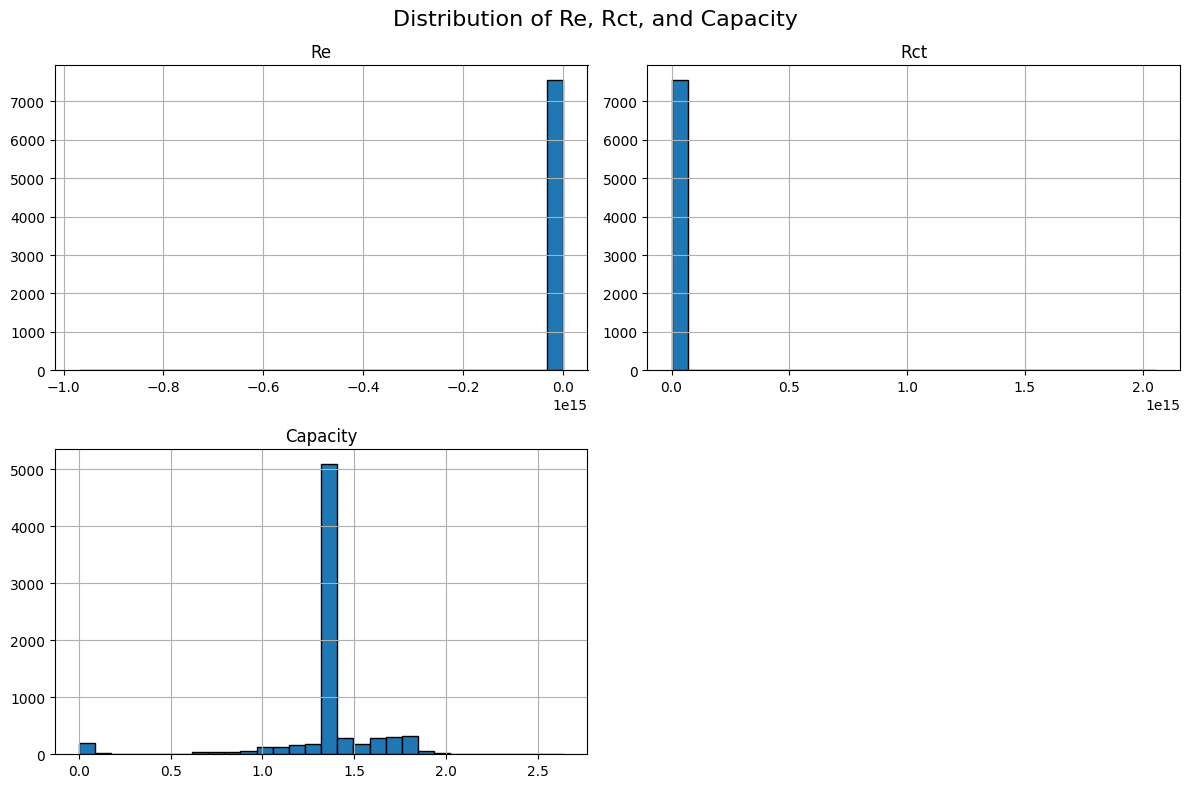

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
df[['Re', 'Rct', 'Capacity']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution of Re, Rct, and Capacity', fontsize=16)
plt.tight_layout()
plt.show()

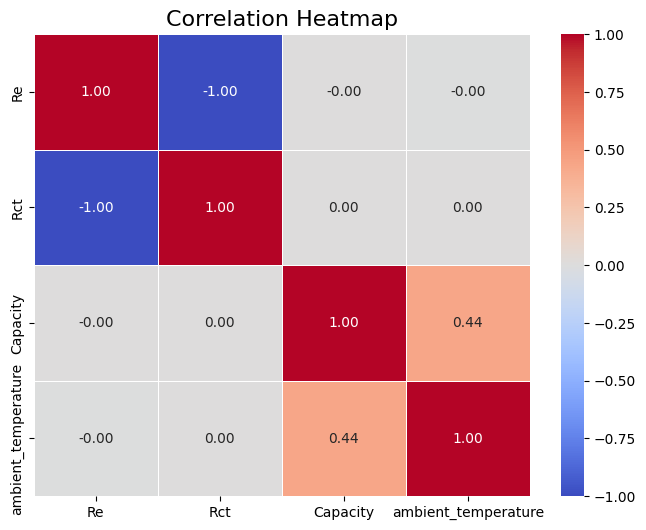

In [21]:
plt.figure(figsize=(8, 6))
corr = df[['Re', 'Rct', 'Capacity', 'ambient_temperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
